In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,power_transform,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from lightgbm import LGBMRegressor
!pip install scikit-plot
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV
!pip install pingouin
import pingouin as pg
import plotly.express as px

In [2]:
train=pd.read_csv("/content/big data mart_train.csv")

In [3]:
test=pd.read_csv('/content/big data mart_test.csv')
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999.0,Medium,Tier 1,Supermarket Type1
1,FDW14,8.3,reg,0.038428,Dairy,87.3198,OUT017,2007.0,NaN,Tier 2,Supermarket Type1
2,NCN55,14.6,Low Fat,0.099575,Others,241.7538,OUT010,1998.0,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007.0,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985.0,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009.0,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002.0,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007.0,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002.0,NaN,Tier 2,Supermarket Type1


In [4]:
test=test.drop(5681)

In [5]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8519,FDS36,8.38,Regular,0.046982,Baking Goods,108.1570,OUT045,2002.0,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.6,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004.0,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.8,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997.0,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
train=train.drop(8523)

In [7]:
train.groupby('Item_Type')['Item_MRP'].agg(['count'])

,count
Item_Type,
Baking Goods,648
Breads,251
Breakfast,110
Canned,649
Dairy,682
Frozen Foods,856
Fruits and Vegetables,1232
Hard Drinks,214
Health and Hygiene,520


In [8]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
#train['total_sa#les']=train['Item_#MRP']*train['Item_Outlet_Sales']

In [10]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [12]:
train['Year_Old']=2013-train['Outlet_Establishment_Year']
test['Year_Old']=2013-test['Outlet_Establishment_Year']

In [13]:
train['Item_Identifier']=train['Item_Identifier'].str[:2]
test['Item_Identifier']=test['Item_Identifier'].str[:2]

In [14]:
train['Outlet_Establishment_Year'].unique()

array([1999., 2009., 1998., 1987., 1985., 2002., 2007., 1997., 2004.])

In [15]:
train['Outlet_Establishment_Year'].unique()

array([1999., 2009., 1998., 1987., 1985., 2002., 2007., 1997., 2004.])

In [16]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Year_Old                        0
dtype: int64

In [17]:
train['Item_Weight']=train['Item_Weight'].astype(float)
test['Item_Weight']=test['Item_Weight'].astype(float)

In [18]:
train['Item_Weight']=train['Item_Weight'].fillna(train.groupby('Item_Type')['Item_Weight'].transform('mean'))
test['Item_Weight']=test['Item_Weight'].fillna(test.groupby('Item_Type')['Item_Weight'].transform('mean'))

In [19]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Year_Old
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,14.0
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228,4.0
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,14.0
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800,15.0
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052,26.0


In [20]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})
test['Item_Fat_Content']=test['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

#Univariate Analysis

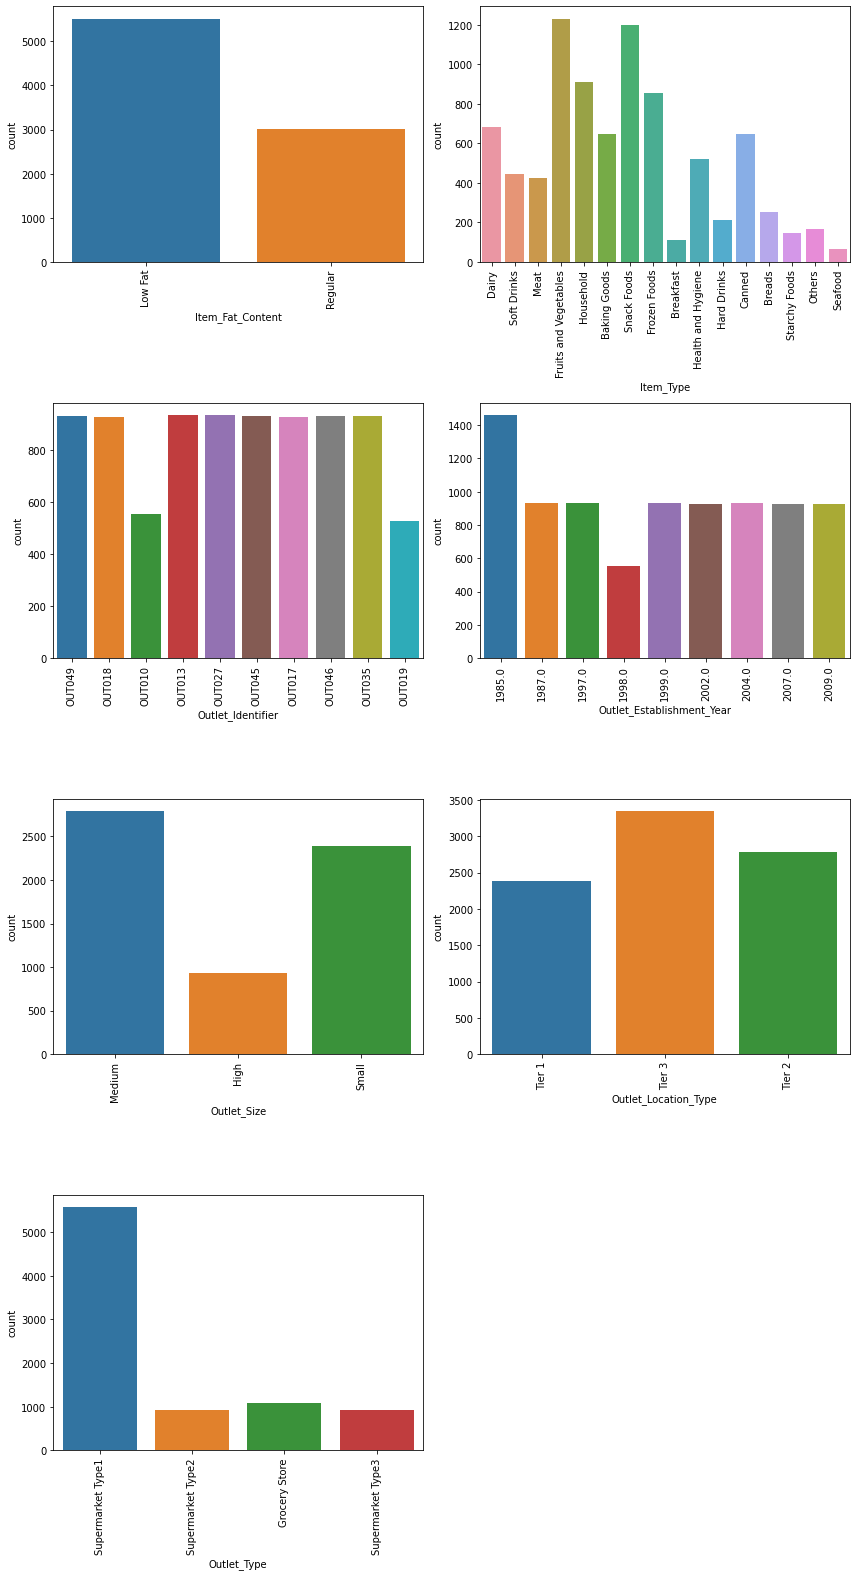

In [21]:
count_col=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
plt.figure(figsize=(12,22))
for i in range(len(count_col)):
  plt.subplot(4,2,i+1)
  sns.countplot(train[count_col[i]])
  plt.xticks(rotation=90)
  plt.tight_layout()

#Observation
1-From item_fat_content we can say low fat item quantity is high people wants to but it for good health

2-from Item_type we can say vegetables and snak foods quantity is high because most of the peoples wants to buy it and seafood and other qunatity is less

3-from Outlet_Establishment we can say more many mart Established in 1985 and less in 1998

4-there are more mart that have medium outlet_size and less of high size

5-more mart are in tier 3 locations,and less in tier 1

6-from outlet_type we can say supermarket type 1 marts are more as compare to others

In [22]:
dist_col=['Item_Weight','Item_Visibility','Item_MRP']

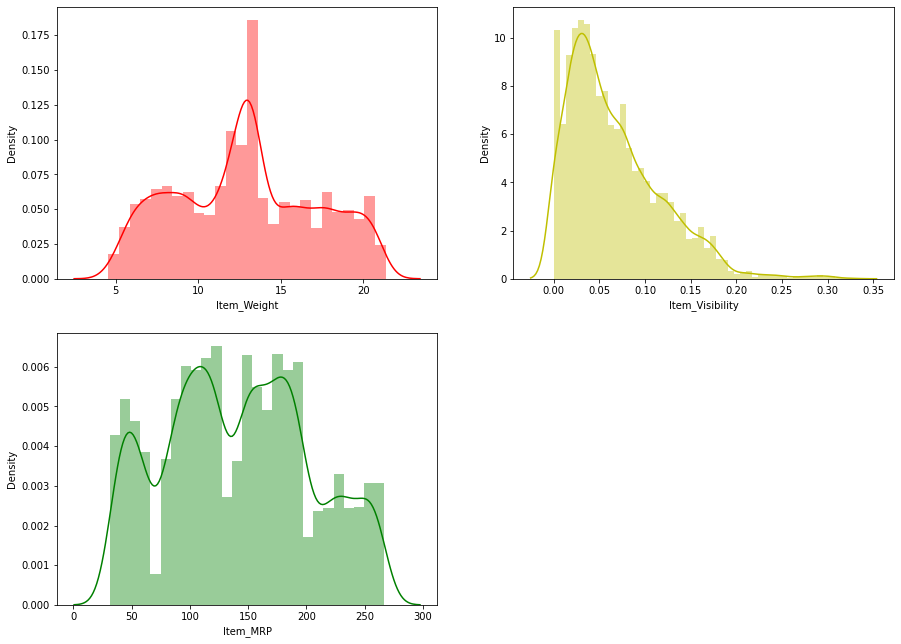

In [23]:
plt.figure(figsize=(15,11))
plt.subplot(2,2,1)
sns.distplot(train['Item_Weight'],color='red')
plt.subplot(2,2,2)
sns.distplot(train['Item_Visibility'],color='y')
plt.subplot(2,2,3)
sns.distplot(train['Item_MRP'],color='g')
plt.show()

#Observation
we only have three columns that have numerical values others are categorical so from these we can say Item_visibility is right skewed and other columns are also skewed very 

#Bivariate Analysis

In [24]:
train_col=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type','Year_Old']

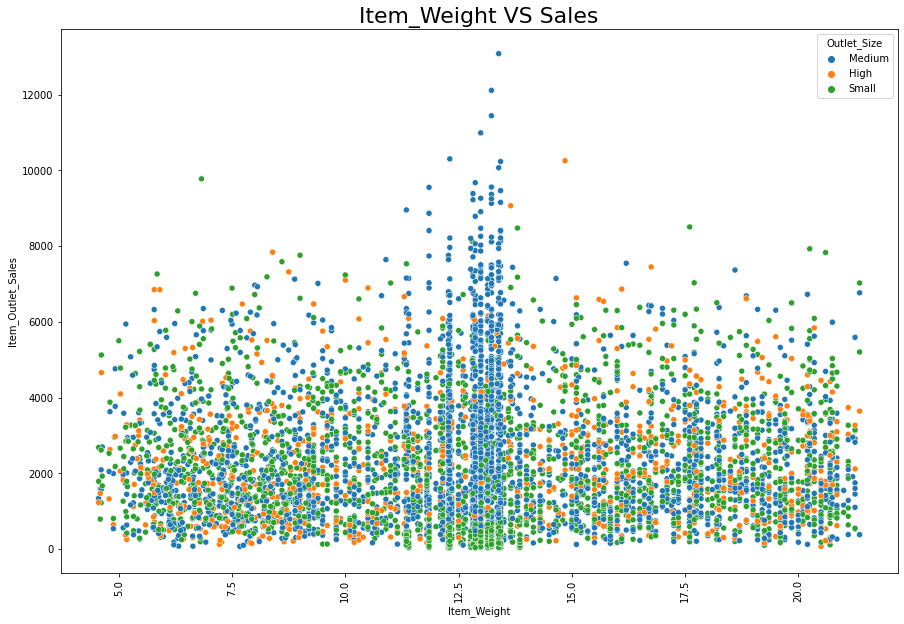

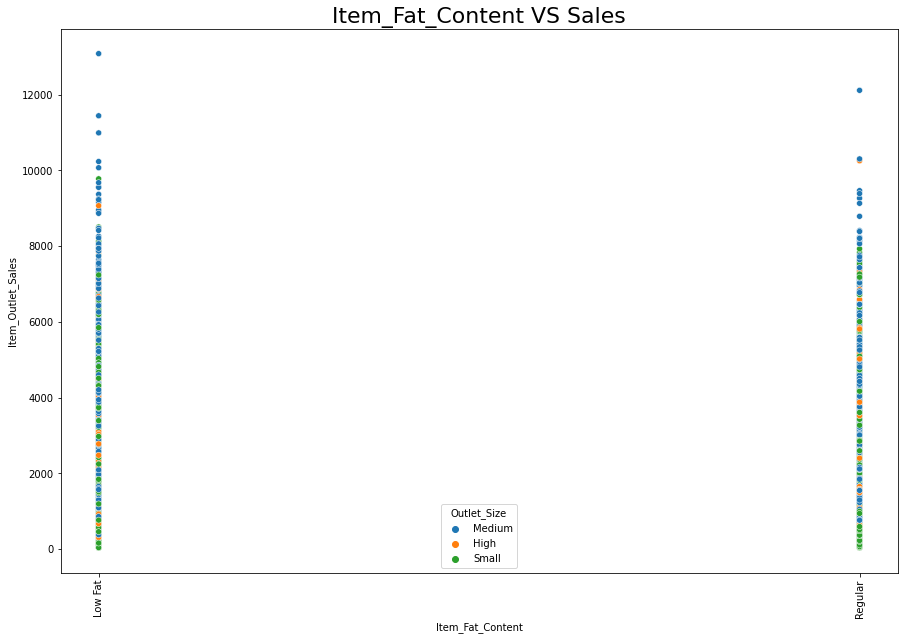

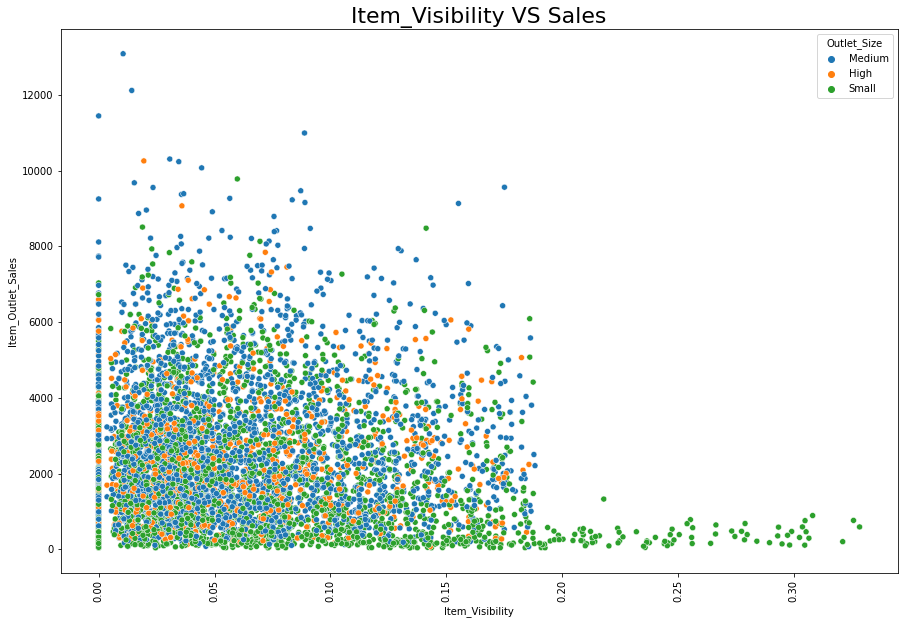

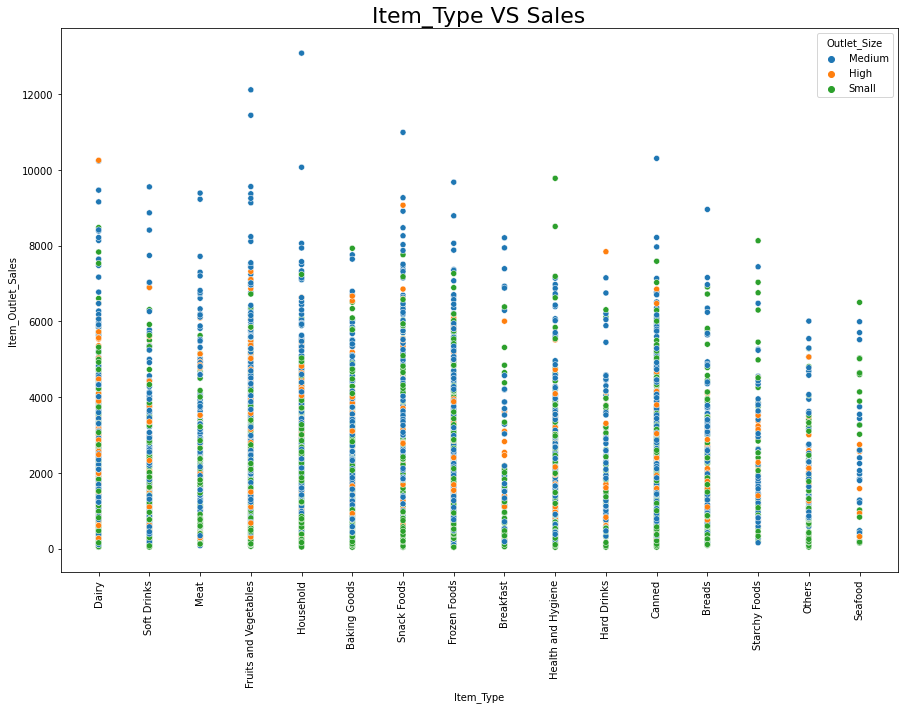

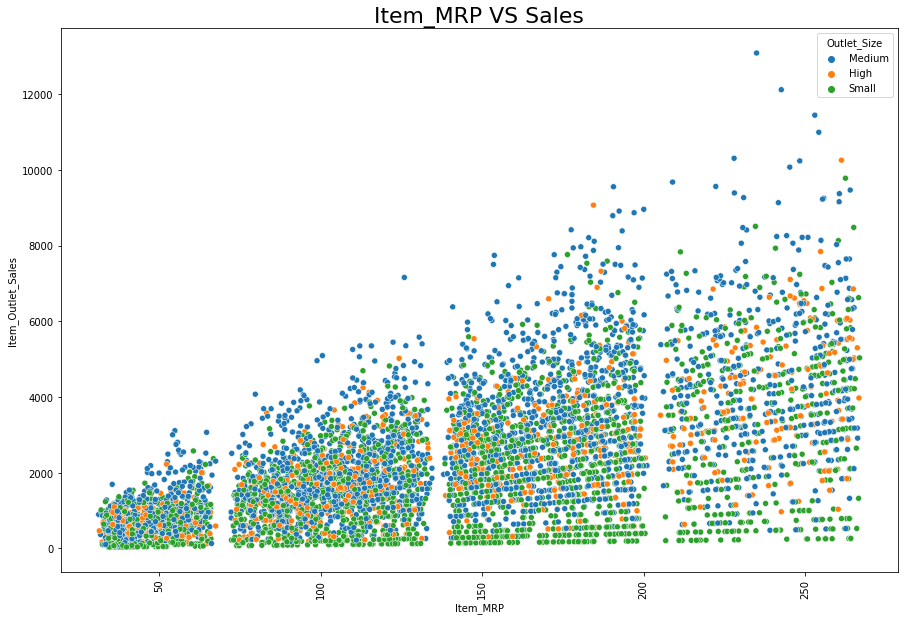

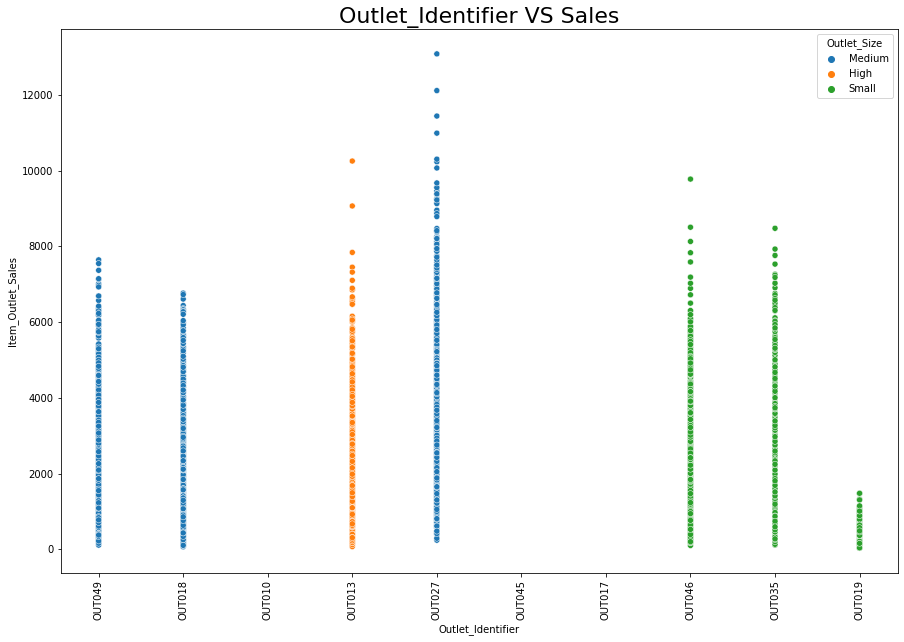

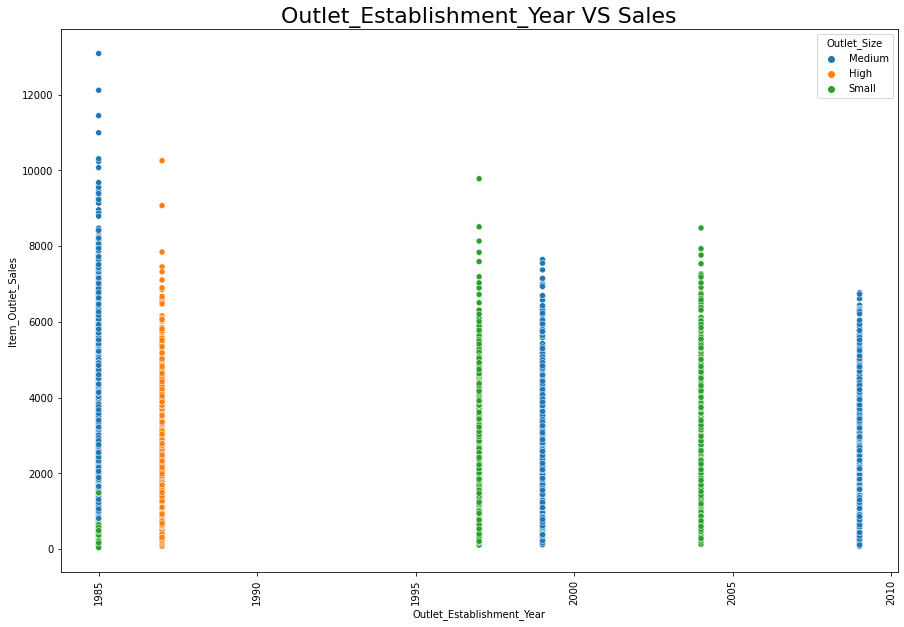

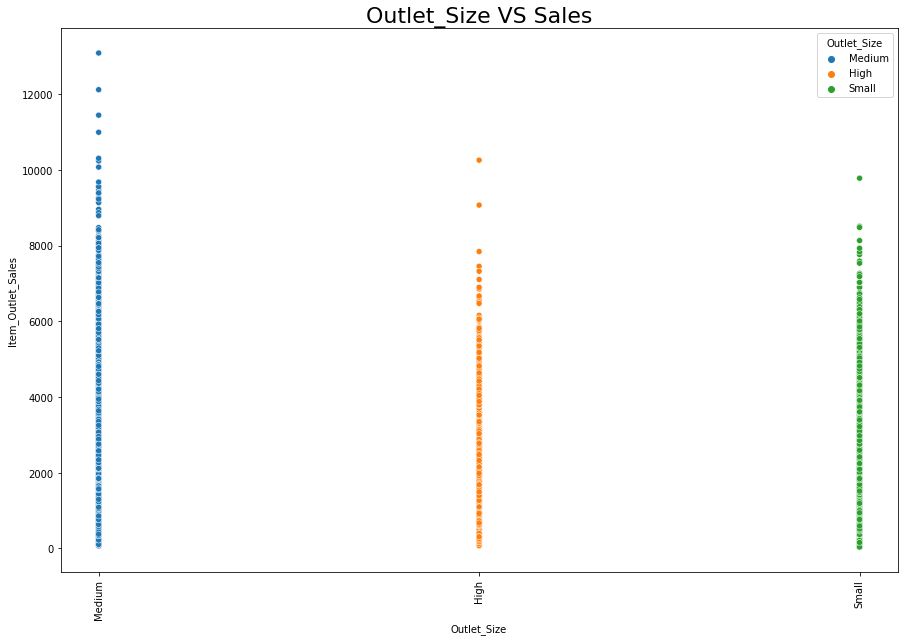

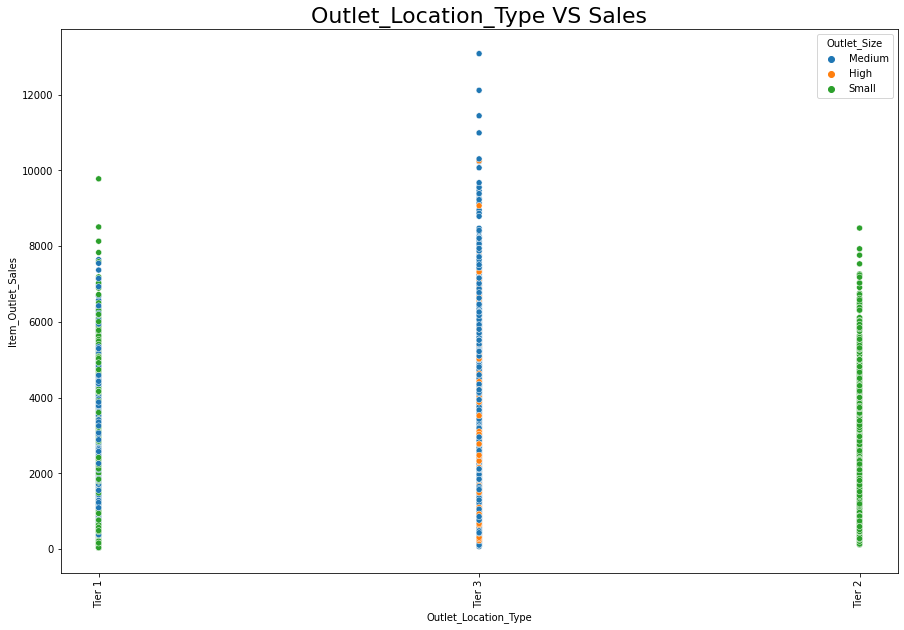

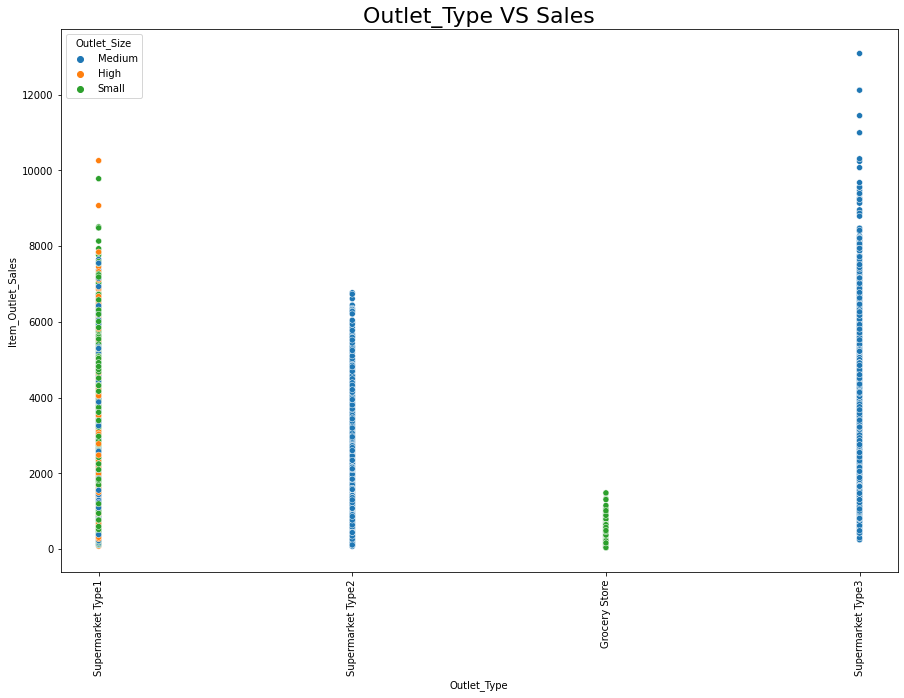

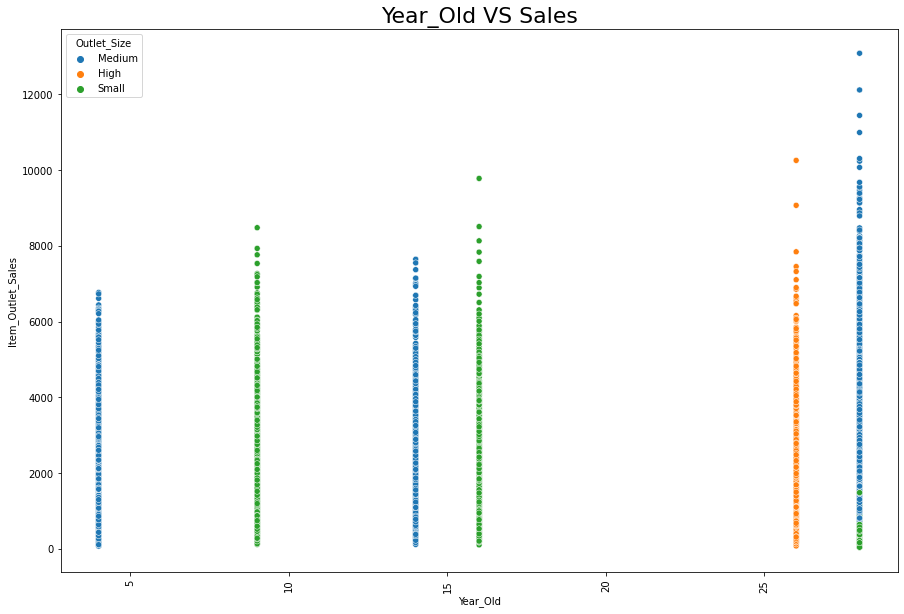

In [25]:
for i in train_col:
  plt.figure(figsize=(15,10))
  sns.scatterplot(x=i,y='Item_Outlet_Sales',data=train,hue='Outlet_Size')
  plt.title(f'{i} VS Sales',fontsize=22)
  plt.xticks(rotation=90)
  plt.show()

#Observation
1-From item weight we can say those item who have a average weight that have a high sales

2-from fat contains we can say low-fat items have high sales

3-from item_visibility we can say those item who have a value range between 0.00 to 0.05 have high sale and as the value goes toward 0.30 sales reduce

4-from item_type we can say Fruit and Vegetables,Household,Snack food have high sales and seafood and others have less sales

5-from item_mrp we can that if price is less more people but that item but sale is less and as the price increase less people buy it but sales increase

6-from outlet_identifier we can say the item with code OUT027 have the highest sale and code OUT010 have less sales

7-from outlet_establishment we can that as old the mart is more popular it is and have high sales

8-from outlet_size we can say the medium size mart have more sales and small have less sales maybe because of less space

9-from location we can say that tiew 3 have the highest sales

10-from outlet_type we can say the supermarket 3 have the highest sales and grocery store has less sales

11-from year old we can say as old the mart the high sales he have

In [26]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Year_Old
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,14.0
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228,4.0
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,14.0
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800,15.0
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052,26.0


In [27]:
train['Outlet_Size']=train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']=test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [28]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Year_Old'],
      dtype='object')

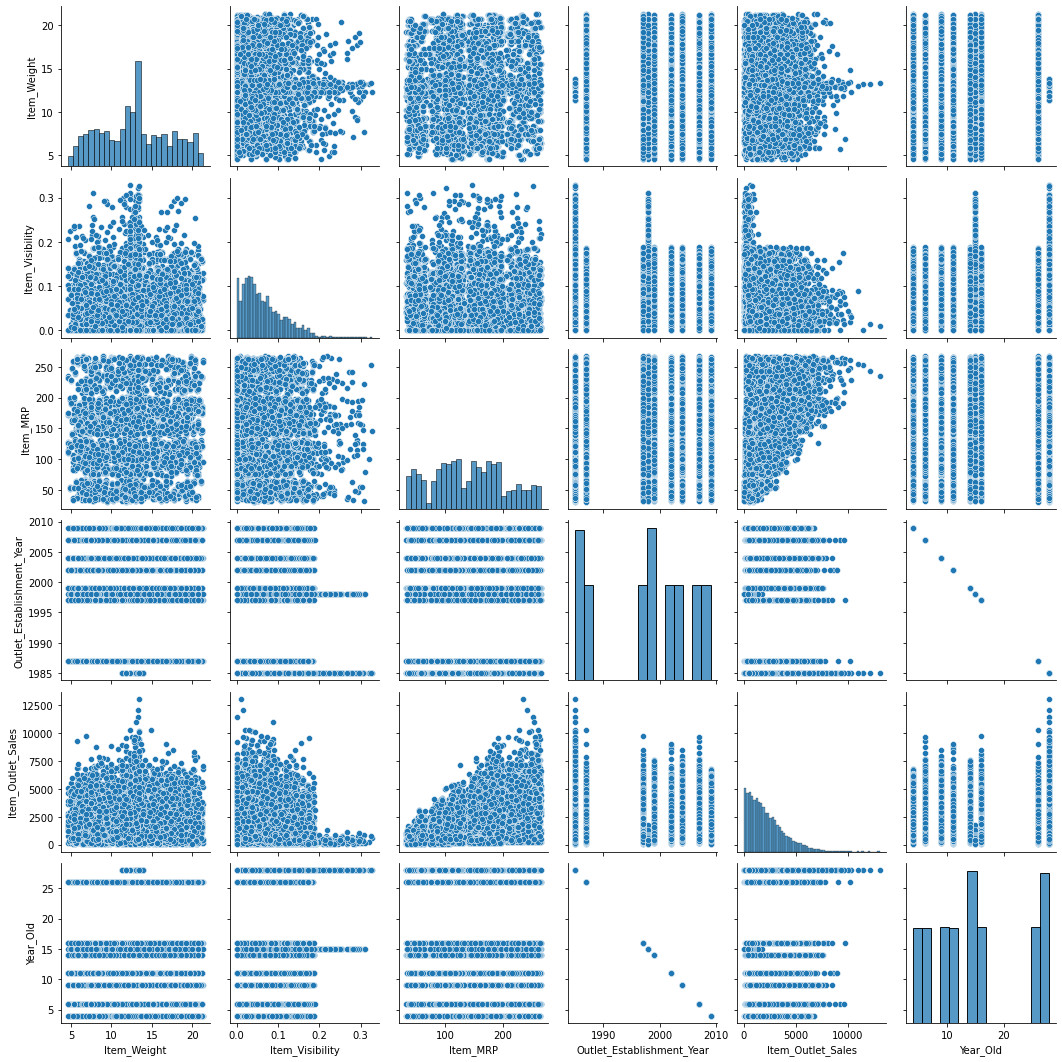

In [29]:
sns.pairplot(train)

In [30]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Year_Old
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,14.0
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228,4.0
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,14.0
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,Medium,Tier 3,Grocery Store,732.3800,15.0
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052,26.0


In [31]:
oe=OrdinalEncoder()
def ordinal_transform(df,column):
  df[column]=oe.fit_transform(df[column])
  return df

In [32]:
def one_hot(df,column):
  df=df.copy()
  dummies=pd.get_dummies(df[column],prefix=column)
  df=pd.concat([df,dummies],axis=1)
  df=df.drop(column,axis=1)
  return df

In [33]:
def preprocess(df):
  df=df.copy()
  X=df.drop('Item_Outlet_Sales',axis=1)
  y=df['Item_Outlet_Sales']
  return X,y

In [34]:
X,y=preprocess(train)

#Now i will do Hypothesis Testing to see if my categorical are statistically significant

In [35]:
expected,observed,stats=pg.chi2_independence(train,x='Item_Fat_Content',y='Item_Outlet_Sales')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,3792.395189,3492.0,2.289462e-04,0.667053,1.0
1,cressie-read,0.666667,3911.630871,3492.0,6.456926e-07,0.677458,1.0
2,log-likelihood,0.000000,4837.793379,3492.0,2.202672e-47,0.753403,1.0
3,freeman-tukey,-0.500000,NaN,3492.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,3492.0,0.000000e+00,inf,1.0
5,neyman,-2.000000,NaN,3492.0,NaN,NaN,NaN


**The p value for fat_content is less then 0.05 that means it is statistically significant**

In [36]:
expected,observed,stats=pg.chi2_independence(train,x='Outlet_Type',y='Item_Outlet_Sales')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,1.423318e+04,10476.0,3.437197e-121,0.746095,1.0
1,cressie-read,0.666667,1.199731e+04,10476.0,4.831002e-24,0.684991,1.0
2,log-likelihood,0.000000,1.115529e+04,10476.0,2.114855e-06,0.660516,1.0
3,freeman-tukey,-0.500000,NaN,10476.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,10476.0,0.000000e+00,inf,1.0
5,neyman,-2.000000,NaN,10476.0,NaN,NaN,NaN


**The p value for outlet_type is less then 0.05(according to cressie-read and log-likelihood) that means it is statistically significant**

In [37]:
expected,observed,stats=pg.chi2_independence(train,x='Item_Identifier',y='Item_Outlet_Sales')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,7390.726997,6984.0,0.000359,0.658464,1.0
1,cressie-read,0.666667,6574.755135,6984.0,0.999790,0.621053,1.0
2,log-likelihood,0.000000,6662.734293,6984.0,0.997070,0.625194,1.0
3,freeman-tukey,-0.500000,NaN,6984.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,6984.0,0.000000,inf,1.0
5,neyman,-2.000000,NaN,6984.0,NaN,NaN,NaN


**The p value for item_identifier is less then 0.05 that means it is statistically significant**

In [38]:
expected,observed,stats=pg.chi2_independence(train,x='Item_Fat_Content',y='Item_Outlet_Sales')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,3792.395189,3492.0,2.289462e-04,0.667053,1.0
1,cressie-read,0.666667,3911.630871,3492.0,6.456926e-07,0.677458,1.0
2,log-likelihood,0.000000,4837.793379,3492.0,2.202672e-47,0.753403,1.0
3,freeman-tukey,-0.500000,NaN,3492.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,3492.0,0.000000e+00,inf,1.0
5,neyman,-2.000000,NaN,3492.0,NaN,NaN,NaN


**The p value for fat_content is less then 0.05 that means it is statistically significant**

In [39]:
expected,observed,stats=pg.chi2_independence(train,x='Outlet_Location_Type',y='Item_Outlet_Sales')
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,7198.756727,6984.0,3.558181e-02,0.649857,1.0
1,cressie-read,0.666667,7192.580329,6984.0,3.978374e-02,0.649578,1.0
2,log-likelihood,0.000000,8509.205957,6984.0,7.133228e-34,0.706534,1.0
3,freeman-tukey,-0.500000,NaN,6984.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,6984.0,0.000000e+00,inf,1.0
5,neyman,-2.000000,NaN,6984.0,NaN,NaN,NaN


**The p value for location_type is less then 0.05 that means it is statistically significant**

In [40]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Year_Old'],
      dtype='object')

In [41]:
train['Year_Old'].unique()

array([14.,  4., 15., 26., 28., 11.,  6., 16.,  9.])

In [42]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Year_Old
0,FD,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,14.0
1,DR,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,4.0
2,FD,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,14.0
3,FD,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,Medium,Tier 3,Grocery Store,15.0
4,NC,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987.0,High,Tier 3,Supermarket Type1,26.0
8519,FD,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002.0,Medium,Tier 2,Supermarket Type1,11.0
8520,NC,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004.0,Small,Tier 2,Supermarket Type1,9.0
8521,FD,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,4.0


In [43]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Year_Old                     0
dtype: int64

In [44]:
cols=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Identifier']
X=ordinal_transform(X,cols)
test=ordinal_transform(test,cols)

In [45]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Year_Old
0,1.0,20.75000,0.0,0.007565,Snack Foods,107.8622,OUT049,1999.0,1.0,0.0,1.0,14.0
1,1.0,8.30000,1.0,0.038428,Dairy,87.3198,OUT017,2007.0,1.0,1.0,1.0,6.0
2,2.0,14.60000,0.0,0.099575,Others,241.7538,OUT010,1998.0,1.0,2.0,0.0,15.0
3,1.0,7.31500,0.0,0.015388,Snack Foods,155.0340,OUT017,2007.0,1.0,1.0,1.0,6.0
4,1.0,12.95504,1.0,0.118599,Dairy,234.2300,OUT027,1985.0,1.0,2.0,3.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1.0,10.50000,1.0,0.013496,Snack Foods,141.3154,OUT046,1997.0,2.0,0.0,1.0,16.0
5677,1.0,7.60000,1.0,0.142991,Starchy Foods,169.1448,OUT018,2009.0,1.0,2.0,2.0,4.0
5678,2.0,10.00000,0.0,0.073529,Health and Hygiene,118.7440,OUT045,2002.0,1.0,1.0,1.0,11.0
5679,1.0,15.30000,1.0,0.000000,Canned,214.6218,OUT017,2007.0,1.0,1.0,1.0,6.0


In [ ]:
colum=['Item_Type','Outlet_Identifier']
X=one_hot(X,colum)
test=one_hot(test,colum)
Test=test

#I used ordinalencode where i was having features that have order and which features have more labels i used onehot

In [47]:
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Year_Old,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,1.0,9.300,0.0,0.016047,249.8092,1999.0,1.0,0.0,1.0,14.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.0,5.920,1.0,0.019278,48.2692,2009.0,1.0,2.0,2.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1.0,17.500,0.0,0.016760,141.6180,1999.0,1.0,0.0,1.0,14.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.0,19.200,1.0,0.000000,182.0950,1998.0,1.0,2.0,0.0,15.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2.0,8.930,0.0,0.000000,53.8614,1987.0,0.0,2.0,1.0,26.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,6.865,0.0,0.056783,214.5218,1987.0,0.0,2.0,1.0,26.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
8519,1.0,8.380,1.0,0.046982,108.1570,2002.0,1.0,1.0,1.0,11.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8520,2.0,10.600,0.0,0.035186,85.1224,2004.0,2.0,1.0,1.0,9.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8521,1.0,7.210,1.0,0.145221,103.1332,2009.0,1.0,2.0,2.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


#Multiple linear regression test

In [48]:
pg.linear_regression(X,y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-0.003495,0.000749,-4.664622,3.139105e-06,0.563773,0.562283,-0.004964,-0.002027
1,Item_Identifier,-44.331952,108.288847,-0.409386,6.822666e-01,0.563773,0.562283,-256.604444,167.940540
2,Item_Weight,-0.327851,2.918740,-0.112326,9.105675e-01,0.563773,0.562283,-6.049291,5.393590
3,Item_Fat_Content,42.149370,28.461685,1.480916,1.386660e-01,0.563773,0.562283,-13.642458,97.941199
4,Item_Visibility,-299.869469,248.955120,-1.204512,2.284253e-01,0.563773,0.562283,-787.882087,188.143148
5,Item_MRP,15.570386,0.198130,78.586699,0.000000e+00,0.563773,0.562283,15.182002,15.958769
6,Outlet_Establishment_Year,-0.206070,0.063632,-3.238464,1.206371e-03,0.563773,0.562283,-0.330804,-0.081336
7,Outlet_Size,-237.814356,17.170548,-13.850132,3.732615e-43,0.563773,0.562283,-271.472808,-204.155905
8,Outlet_Location_Type,-261.157085,15.398159,-16.960280,1.778592e-63,0.563773,0.562283,-291.341224,-230.972946
9,Outlet_Type,902.309271,15.210069,59.323156,0.000000e+00,0.563773,0.562283,872.493835,932.124707


#I found that pvalue is good with all the columns you migh see some where less p value it is just because i converted columns into onehot so it is showing for single levels 

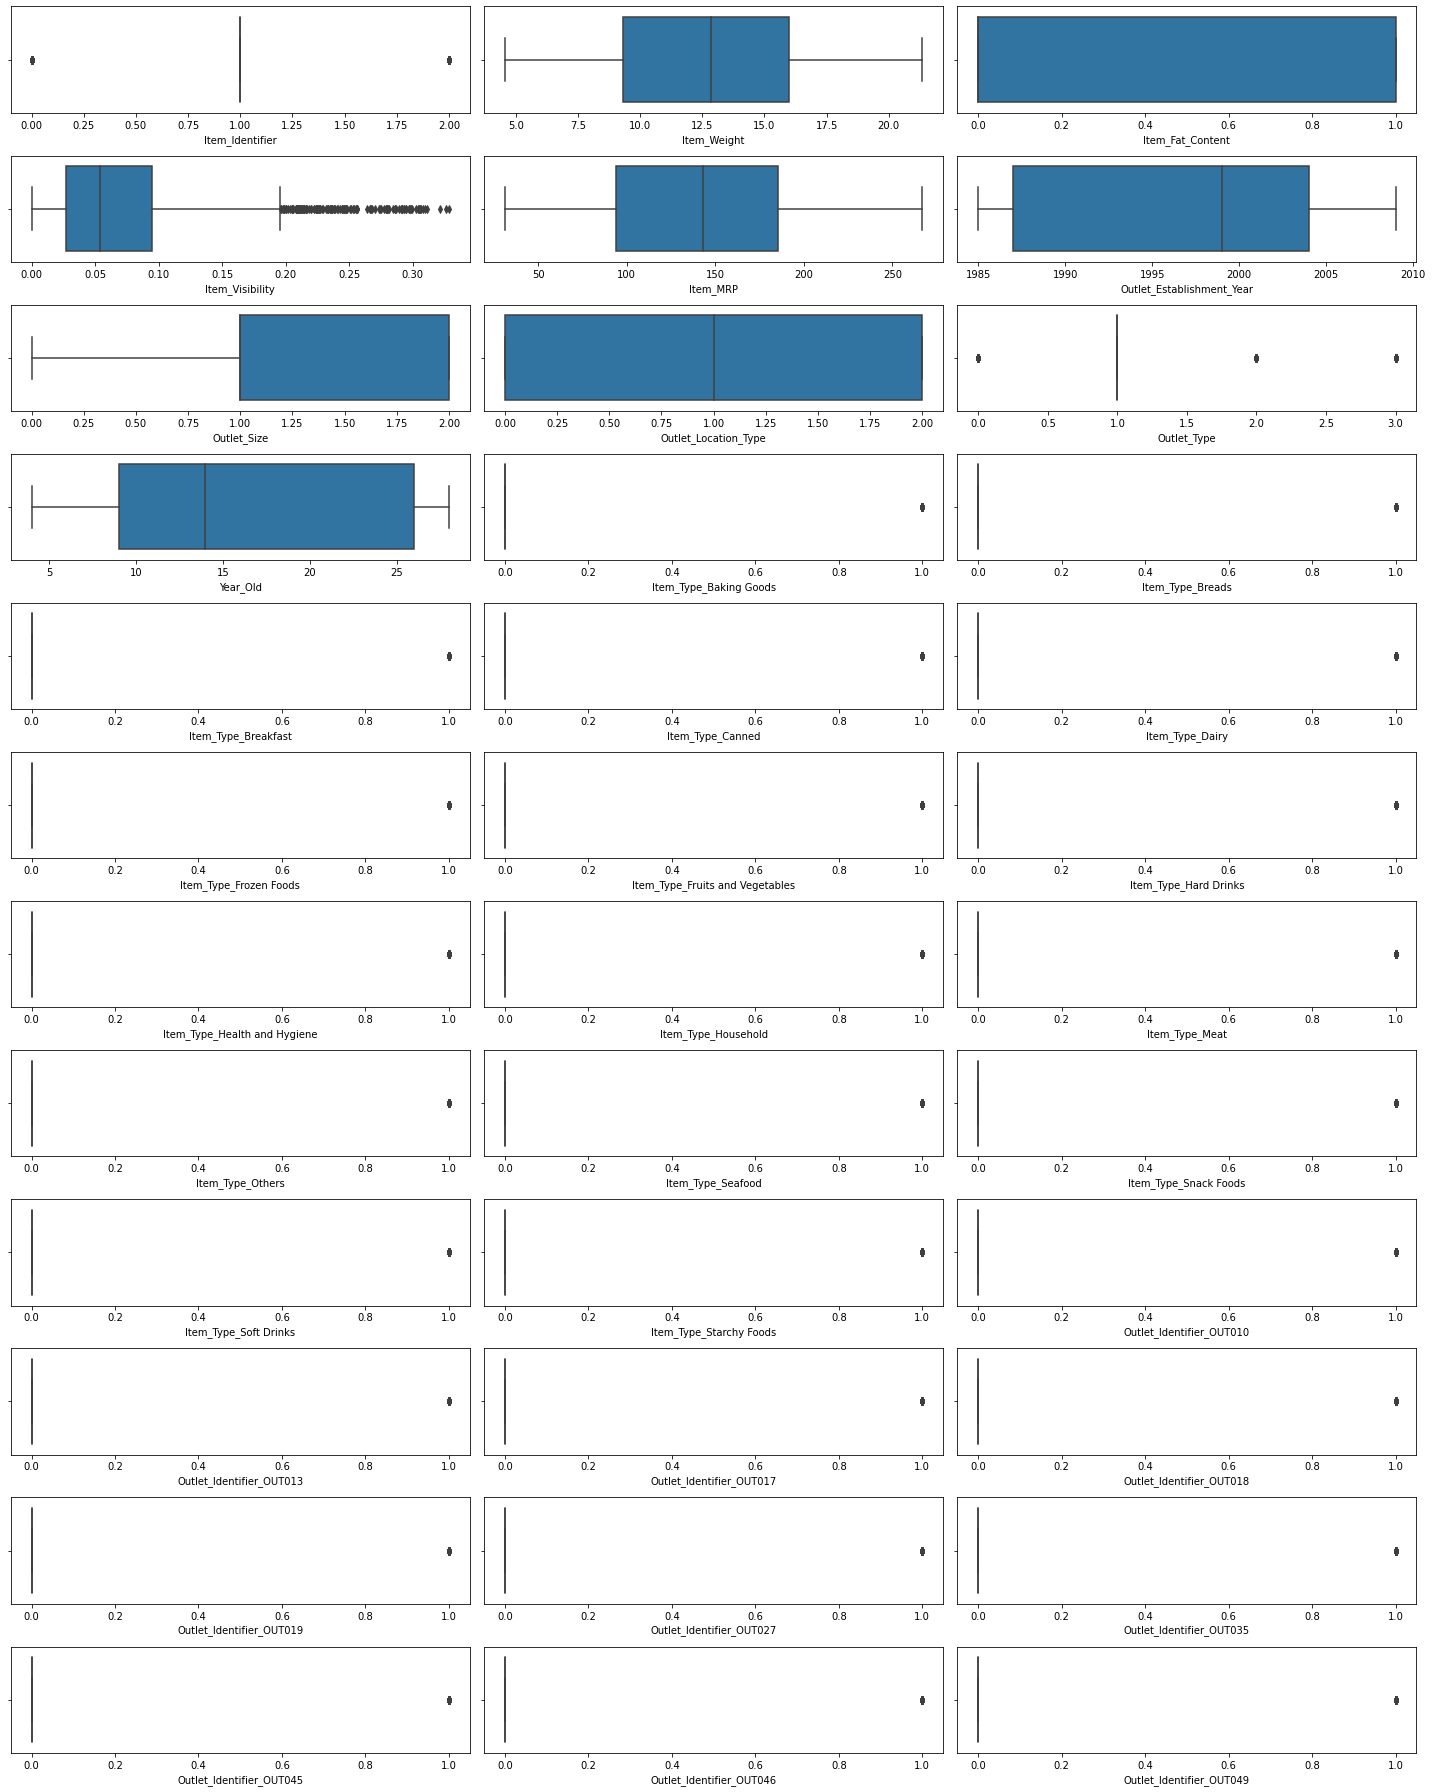

In [49]:
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(len(X_val)):
  plt.subplot(12,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

In [50]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col] <=percentile[0]]=percentile[0]
  X[col][X[col] >=percentile[1]]=percentile[1]

**Filling outliers with percentile method**

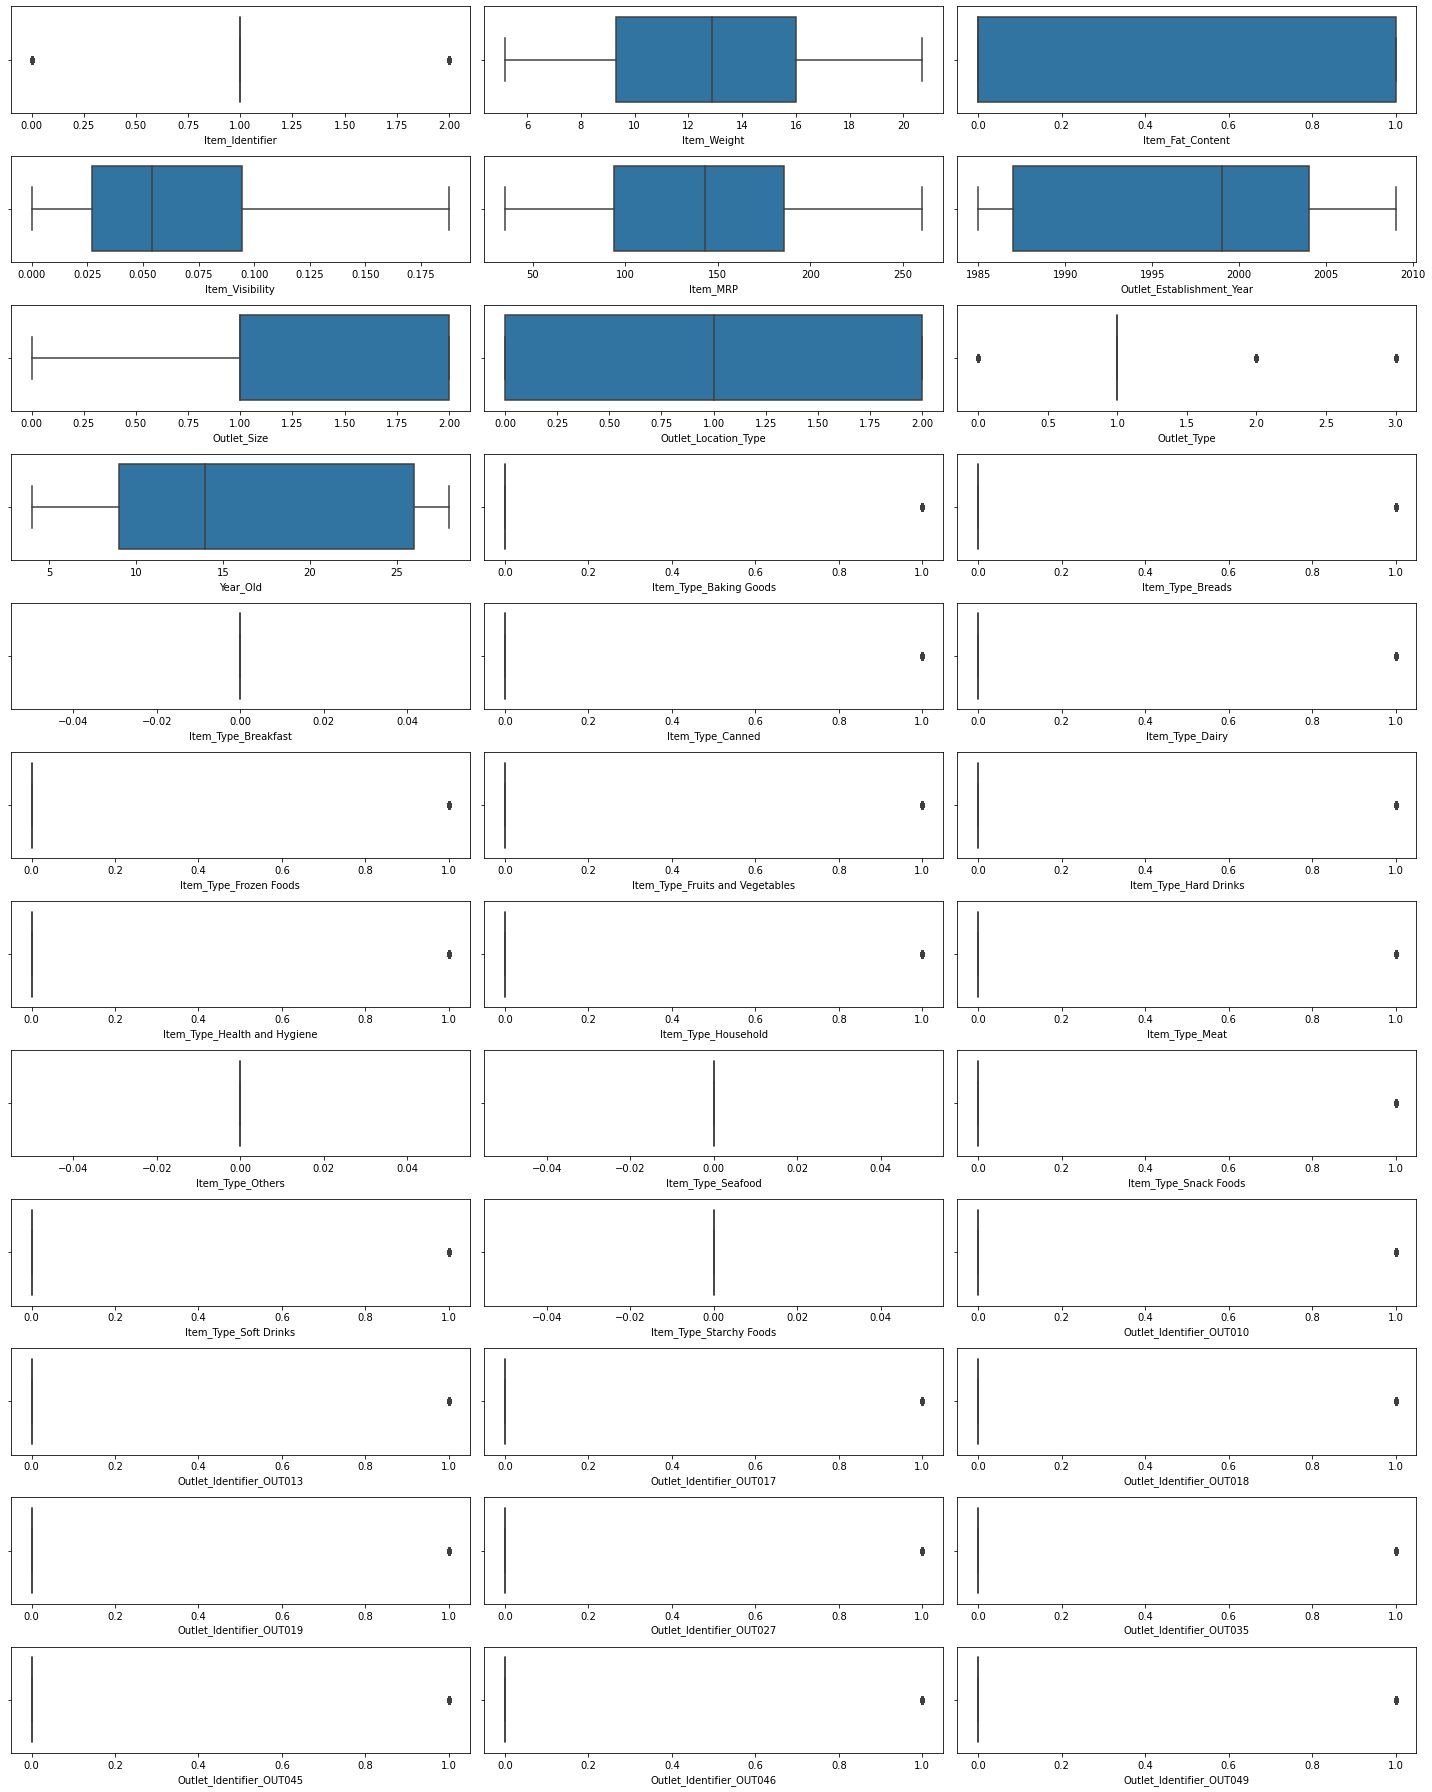

In [51]:
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(len(X_val)):
  plt.subplot(12,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

we removed lots of outliers from item_visibility using percentile method

In [52]:
X.skew()

Item_Identifier                    0.114510
Item_Weight                        0.087373
Item_Fat_Content                   0.616705
Item_Visibility                    0.778953
Item_MRP                           0.121872
Outlet_Establishment_Year         -0.396641
Outlet_Size                       -0.087072
Outlet_Location_Type              -0.209093
Outlet_Type                        0.927438
Year_Old                           0.396641
Item_Type_Baking Goods             3.199792
Item_Type_Breads                   5.567533
Item_Type_Breakfast                0.000000
Item_Type_Canned                   3.196644
Item_Type_Dairy                    3.096356
Item_Type_Frozen Foods             2.659119
Item_Type_Fruits and Vegetables    2.021988
Item_Type_Hard Drinks              6.071724
Item_Type_Health and Hygiene       3.668801
Item_Type_Household                2.547106
Item_Type_Meat                     4.136741
Item_Type_Others                   0.000000
Item_Type_Seafood               

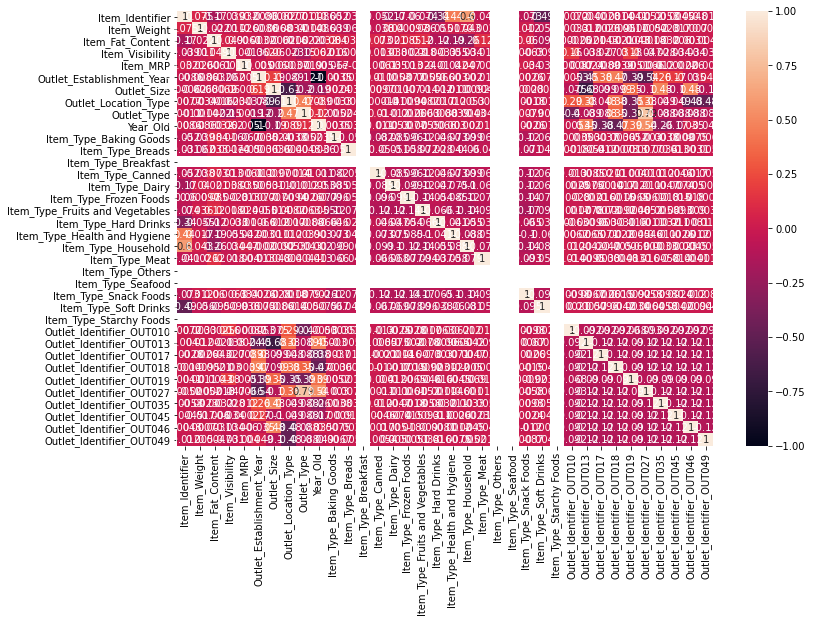

In [53]:
plt.figure(figsize=(12,8))
X_corr=X.corr()
sns.heatmap(X_corr,annot=True)

From heatmap we can see we have many columns that have less correlation but some columns like location_type and outlet_identifier have good correlation 

In [54]:
x=X

#Feature scaling

In [55]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=x.columns)

In [56]:
test=scaler.fit_transform(test)
test=pd.DataFrame(test,columns=x.columns)

In [57]:
from sklearn.preprocessing import power_transform
X_new=power_transform(X,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

In [58]:
test=power_transform(X,method='yeo-johnson')
test=pd.DataFrame(test,columns=x.columns)

In [59]:
X_new.skew()

Item_Identifier                    0.032378
Item_Weight                       -0.033566
Item_Fat_Content                   0.616705
Item_Visibility                    0.074855
Item_MRP                          -0.029905
Outlet_Establishment_Year         -0.206070
Outlet_Size                       -0.028743
Outlet_Location_Type              -0.169899
Outlet_Type                       -0.010619
Year_Old                           0.036143
Item_Type_Baking Goods             3.199792
Item_Type_Breads                   5.567533
Item_Type_Breakfast                0.000000
Item_Type_Canned                   3.196644
Item_Type_Dairy                    3.096356
Item_Type_Frozen Foods             2.659119
Item_Type_Fruits and Vegetables    2.021988
Item_Type_Hard Drinks              6.071724
Item_Type_Health and Hygiene       3.668801
Item_Type_Household                2.547106
Item_Type_Meat                     4.136741
Item_Type_Others                   0.000000
Item_Type_Seafood               

In [60]:
pg.linear_regression(X,y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,97.161544,56.945670,1.706215,8.800465e-02,0.56385,0.562516,-14.465822,208.788909
1,Item_Identifier,-111.327184,151.575619,-0.734466,4.626849e-01,0.56385,0.562516,-408.452267,185.797899
2,Item_Weight,-5.781687,45.418399,-0.127298,8.987073e-01,0.56385,0.562516,-94.812796,83.249423
3,Item_Fat_Content,42.412613,27.964654,1.516651,1.293921e-01,0.56385,0.562516,-12.404912,97.230138
4,Item_Visibility,-63.419359,49.124240,-1.290999,1.967390e-01,0.56385,0.562516,-159.714819,32.876100
5,Item_MRP,3517.504022,44.646496,78.785668,0.000000e+00,0.56385,0.562516,3429.986029,3605.022014
6,Outlet_Establishment_Year,88.583904,30.355707,2.918196,3.529862e-03,0.56385,0.562516,29.079335,148.088474
7,Outlet_Size,-193.871941,31.011728,-6.251568,4.259385e-10,0.56385,0.562516,-254.662471,-133.081410
8,Outlet_Location_Type,-19.130815,24.607594,-0.777435,4.369236e-01,0.56385,0.562516,-67.367685,29.106054
9,Outlet_Type,1258.723998,22.043719,57.101254,0.000000e+00,0.56385,0.562516,1215.512947,1301.935049


In [61]:
y_new=np.log(y)
y_new=pd.DataFrame(y_new,columns=['Item_Outlet_Sales'])

**I am converting target column into log but at the time of prediction i will inverse it**

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=451)

#Machine Learning

In [63]:
models={
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "LGBMRegressor":LGBMRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "ExtraTreesRegressor":ExtraTreesRegressor()
}

**************************************** GradientBoostingRegressor **********************************************




Score 0.7475538528970256


MEAN_SQUARE_ERROR 1224331.497370074


MEAN_ABSOLUTE_ERROR 756.0138481283732


RMSE 1106.4951411416473


R2_SCORE 0.7475538528970256


MODEL PERFORMANCE CURVE


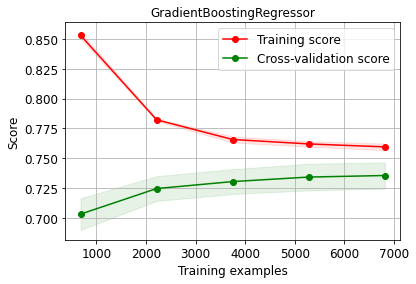

**************************************** LGBMRegressor **********************************************




Score 0.7372853533461412


MEAN_SQUARE_ERROR 1259916.506887382


MEAN_ABSOLUTE_ERROR 765.9579998978443


RMSE 1122.4600246277735


R2_SCORE 0.7372853533461412


MODEL PERFORMANCE CURVE


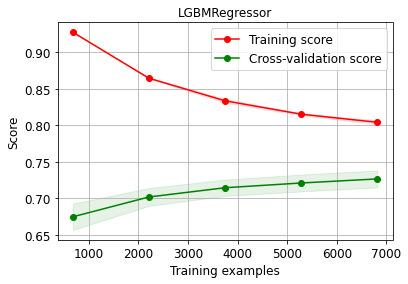

**************************************** RandomForestRegressor **********************************************




Score 0.7185214598267684


MEAN_SQUARE_ERROR 1350147.4579021726


MEAN_ABSOLUTE_ERROR 796.6189857183533


RMSE 1161.9584579072405


R2_SCORE 0.7185214598267684


MODEL PERFORMANCE CURVE


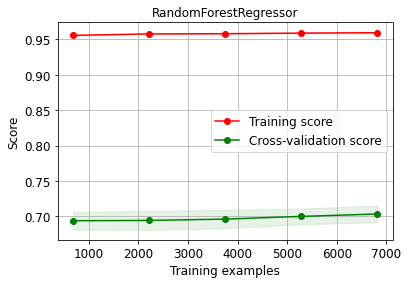

**************************************** XGBRegressor **********************************************
[17:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[17:23:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:23:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Score 0.7477646412526939


MEAN_SQUARE_ERROR 1229856.7790926301


MEAN_ABSOLUTE_ERROR 755.7643045084764


RMSE 1108.989079789621


R2

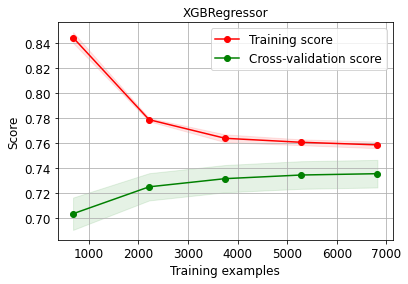

**************************************** ExtraTreesRegressor **********************************************




Score 0.6918440181539257


MEAN_SQUARE_ERROR 1478749.6264287736


MEAN_ABSOLUTE_ERROR 832.4821038082389


RMSE 1216.0384970998136


R2_SCORE 0.6918440181539257


MODEL PERFORMANCE CURVE


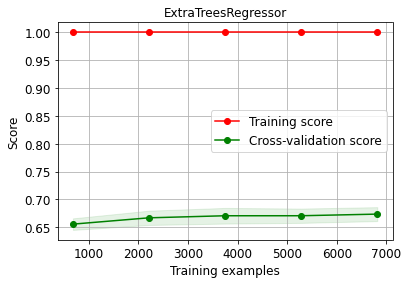

In [64]:
cvs=[]
Model=[]
score=[]
R2_score=[]
Mse=[]
Mae=[]
rmse=[]
for name,model in models.items():
  print("****************************************",name,"**********************************************")
  Model.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print("\n")
  cs=cross_val_score(model,X_new,y_new,cv=5,scoring='r2').mean()
  cvs.append(cs*100)
  mse=mean_squared_error(np.exp(y_test),np.exp(y_pred))
  Mse.append(mse)
  print("\n")
  sc=model.score(X_test,y_test)
  score.append(sc)
  print("Score",sc)
  print("\n")
  print("MEAN_SQUARE_ERROR",mse)
  print("\n")
  mae=mean_absolute_error(np.exp(y_test),np.exp(y_pred))
  Mae.append(mae)
  print("MEAN_ABSOLUTE_ERROR",mae)
  print("\n")
  rmse=np.sqrt(mse)
  print("RMSE",rmse)
  print("\n")
  print("R2_SCORE",r2_score(y_test,y_pred))
  print("\n")
  print("MODEL PERFORMANCE CURVE")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=5,scoring='r2',text_fontsize='large',title=name)
  plt.show()

In [65]:
models_csv=pd.DataFrame({
    'models':Model,
    "Score":score,
    'Cross_val_score':cvs,
    'Msa':Mse,
    'Mae':Mae,
    'RMSE':rmse
})

In [66]:
models_csv

,models,Score,Cross_val_score,Msa,Mae,RMSE
0,GradientBoostingRegressor,0.747554,73.538396,1.224331e+06,756.013848,1216.038497
1,LGBMRegressor,0.737285,72.629447,1.259917e+06,765.958000,1216.038497
2,RandomForestRegressor,0.718521,70.335106,1.350147e+06,796.618986,1216.038497
3,XGBRegressor,0.747765,73.539048,1.229857e+06,755.764305,1216.038497
4,ExtraTreesRegressor,0.691844,67.436062,1.478750e+06,832.482104,1216.038497


GradientBoostingRegressor is giving me 73.53 so i will do hyperparameter tuning of this only

#Hyperparameter tuning

In [67]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [70]:
params={'learning_rate':[0.1,0.01,0.001,0.2],
 'max_depth':[3,2,4,5],
 'min_impurity_decrease':[0.0,0.01,0.02,0.1],
 'min_samples_leaf':[1,2,3],
 'min_samples_split':[2,3,1],
 'n_estimators':[100,200,300]
 }

In [71]:
grid=GridSearchCV(estimator=gbr,param_grid=params,cv=5,n_jobs=-1)

In [73]:
grid.fit(X_new,y_new)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [74]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [75]:
grid.best_score_

0.7372318938970093

**cross_val_score accuracy increased by 73.53 to 73.72**

#Saving model

In [76]:
import joblib
joblib.dump(grid,"BIGMART.obj")

['BIGMART.obj']

In [77]:
Mart=joblib.load("/content/BIGMART.obj")

#Final model learning curve

In [79]:
GBR=GradientBoostingRegressor(learning_rate= 0.1,
 max_depth= 2,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 100)

What i did here is i placed all the values that i got while hyperparameter tuning just for plotting learning curve 

LearningCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fa61103bc10>,
              cv=None, exploit_incremental_learning=False, groups=None,
              model=None, n_jobs=1, pre_dispatch='all', random_state=None,
              scoring='r2', shuffle=False,
              train_sizes=array([0.1  , 0.325, 0.55 , 0.775, 1.   ]))

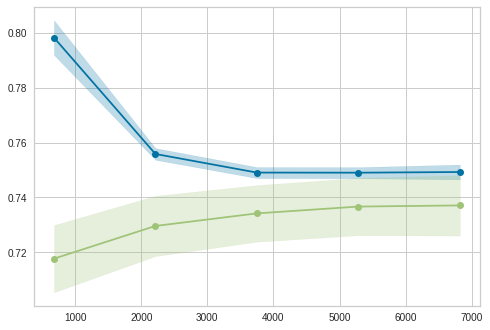

In [80]:
from yellowbrick.model_selection import LearningCurve
visualizer = LearningCurve(GBR,scoring='r2')
visualizer.fit(X_new,y_new)

#Final model performance metrics

In [82]:
GBR.fit(X_train,y_train)
y_pred=GBR.predict(X_test)
print("MEAN_SQUARE_ERROR",mean_squared_error(y_test,y_pred))
print("ROOT_MEAN_SQUARE_ERROR",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MEAN_ABSOLUTE_ERROR",mean_absolute_error(y_test,y_pred))
print("R2_SCORE",r2_score(y_test,y_pred))

MEAN_SQUARE_ERROR 0.26357313338468297
ROOT_MEAN_SQUARE_ERROR 0.5133937410844458
MEAN_ABSOLUTE_ERROR 0.3943178287078638
R2_SCORE 0.7488728711409522


In [83]:
test_pred=Mart.predict(test)

In [84]:
test_pred=pd.DataFrame(test_pred,columns=['Total_Sales'])
final_data=pd.concat([Test,np.exp(test_pred)],axis=1)

In [85]:
final_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Year_Old,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Total_Sales
0,1.0,20.75000,0.0,0.007565,107.8622,1999.0,1.0,0.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3668.219571
1,1.0,8.30000,1.0,0.038428,87.3198,2007.0,1.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,585.723981
2,2.0,14.60000,0.0,0.099575,241.7538,1998.0,1.0,2.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010.193394
3,1.0,7.31500,0.0,0.015388,155.0340,2007.0,1.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,413.000460
4,1.0,12.95504,1.0,0.118599,234.2300,1985.0,1.0,2.0,3.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,766.303885


#Conclusion
we build a model that can predict the sales i did EDA to understand how features are behaving with respect to sales and we was having less outliers only in one column we had outliers i removed it by using percentile and i did hyperparameters tuning but accuracy did not increased and at the time of model building i applied log on target column and at the time of prediction i inversed it so we can see the original price 